# **Heart Disease Prediction** 
Let's Test Your skills in Classification Also  But this Time Let's Jump to Kaggle Platform !
https://www.kaggle.com/ronitf/heart-disease-uci/tasks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
dt = pd.read_csv("heart.csv")


In [4]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

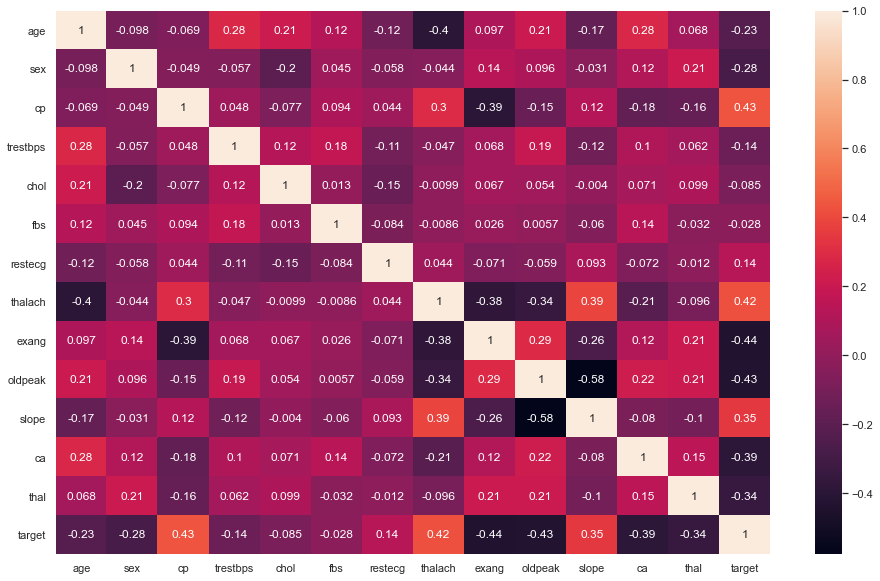

In [6]:
plt.figure(figsize = (16,10))
sns_plot = sns.heatmap(dt.corr(),annot=True)
plt.show()

In [7]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
y = dt['target'].values
X = dt.drop(['target'],1).values

In [9]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [10]:
X_train.shape

(212, 13)

In [11]:
y_train.shape

(212,)

In [27]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 3, min_samples_leaf = 2)
Dtree.fit(X_train,y_train)
y_prd = Dtree.predict(X_test)
from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_test,y_prd)


In [28]:
Acc

0.8461538461538461

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.84      0.88      0.86        48

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



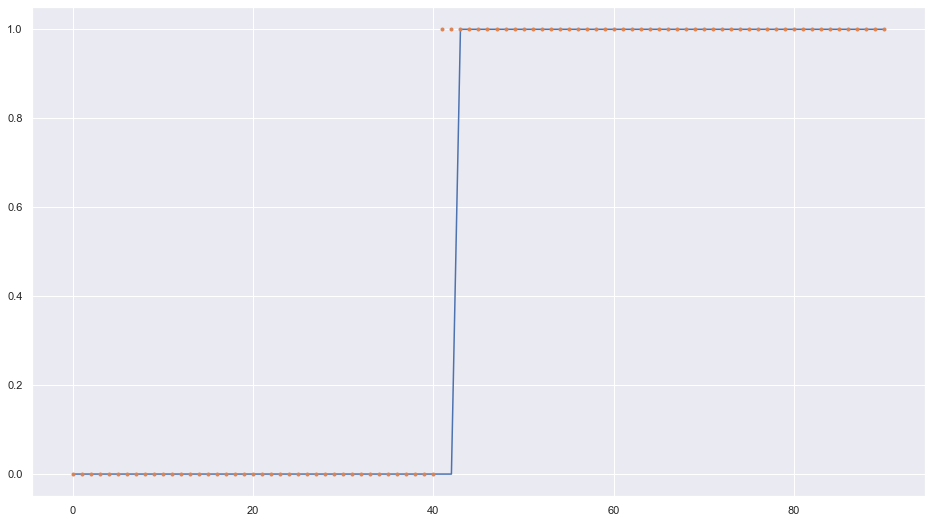

In [29]:
plt.figure(figsize=(16,9))
plt.plot(np.sort(y_test),'-',np.sort(y_prd), '.')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(X_train,y_train)
y_lg_prd = lg_reg.predict(X_test)

lg_acc = accuracy_score(y_test,y_lg_prd)
print(lg_acc)

0.9340659340659341


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lg_prd))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



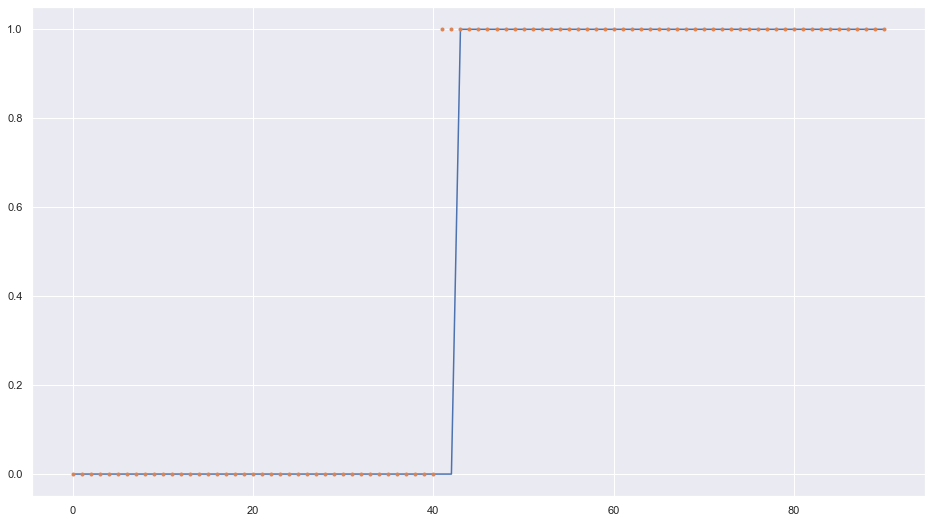

In [33]:
plt.figure(figsize=(16,9))
plt.plot(np.sort(y_test),'-',np.sort(y_lg_prd), '.')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
listt=[]

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_kn_pred = neigh.predict(X_test)

kn_acc= accuracy_score(y_test,y_kn_pred)
    
print(kn_acc)

0.7142857142857143


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_kn_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        43
           1       0.74      0.71      0.72        48

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



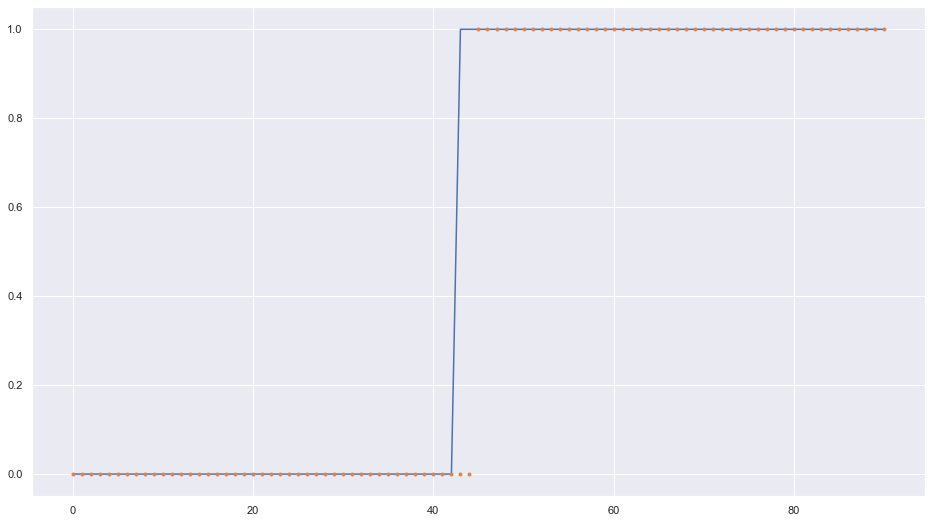

In [36]:
plt.figure(figsize=(16,9))
plt.plot(np.sort(y_test),'-',np.sort(y_kn_pred), '.')
plt.show()

In [37]:
from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
classifier = SVC(kernel = 'linear')
classifier.fit(X_train,y_train)
y_pr=classifier.predict(X_test)

svm_acc= accuracy_score(y_test,y_pr)

print(svm_acc)

0.9230769230769231


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.90      0.96      0.93        48

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



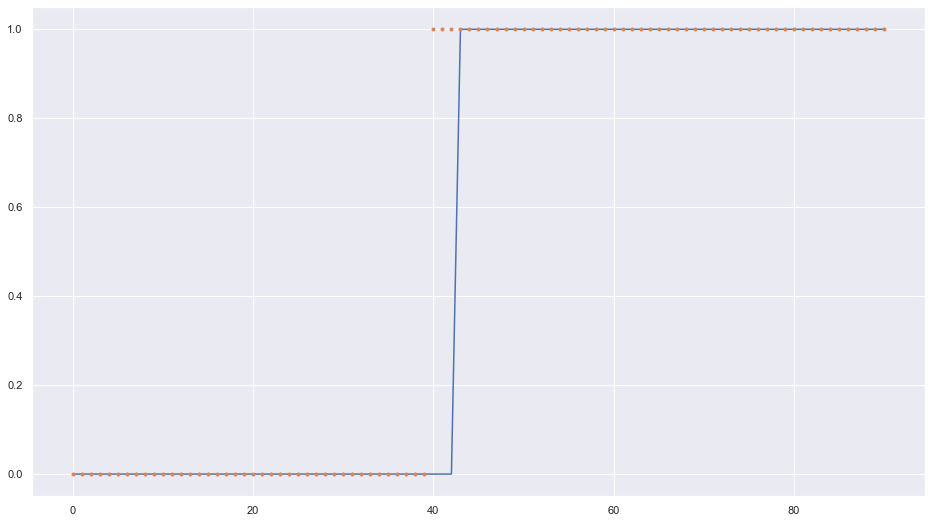

In [41]:
plt.figure(figsize=(16,9))
plt.plot(np.sort(y_test),'-',np.sort(y_pr), '.')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier 
# n_estimators -number of trees(default 100)-
# max_depth
# n_jobs
#random_state
#warm_start
Rand_clf = RandomForestClassifier(max_depth=3,random_state=0,n_estimators=800)
Rand_clf.fit(X_train,y_train)
y_Rand_pred = Rand_clf.predict(X_test)

In [43]:
acc= accuracy_score(y_test,y_Rand_pred)
print(acc*100)

91.20879120879121


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_Rand_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.88      0.96      0.92        48

    accuracy                           0.91        91
   macro avg       0.92      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



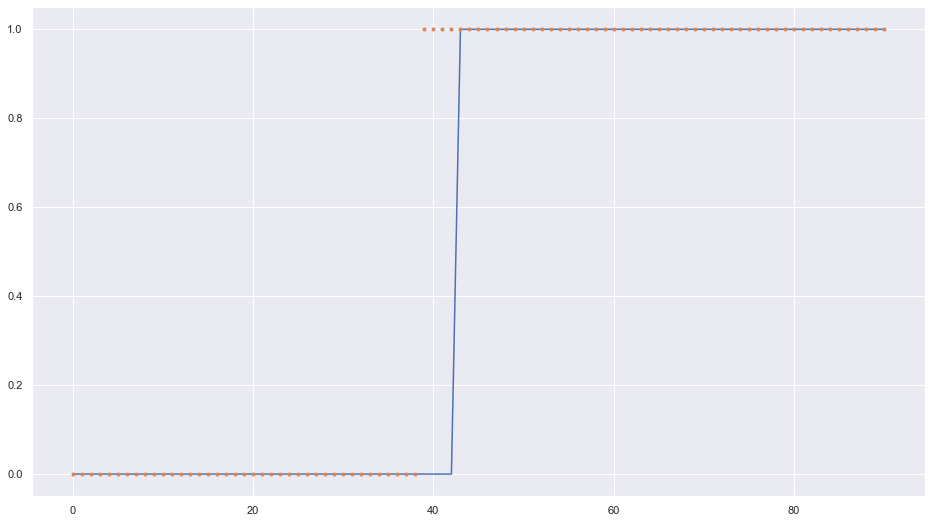

In [45]:
plt.figure(figsize=(16,9))
plt.plot(np.sort(y_test),'-',np.sort(y_Rand_pred), '.')
plt.show()


In [60]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[800,1000,1200,1500],'max_depth':[3,5,7]}]

gridsearch  = GridSearchCV(estimator = Rand_clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
gridsearch = gridsearch.fit(X_train, y_train)

In [61]:
print("best accuracy is :" , gridsearch.best_score_)

gridsearch.best_params_   # best_parms


best accuracy is : 0.8116883116883116


{'max_depth': 3, 'n_estimators': 800}

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
adaboost.fit(X_train, y_train)
y_ada = adaboost.predict(X_test)

add_Acc = accuracy_score(y_test,y_ada)

In [51]:
add_Acc

0.8791208791208791

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[200,400,800,1000],'learning_rate':[0.1,0.6,0.9,10]}]

gridsearch  = GridSearchCV(estimator = adaboost,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
gridsearch = gridsearch.fit(X_train, y_train)

In [49]:
gridsearch.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=lg,random_state=0)#n_estimators=200,learning_rate=0.1
adaboost.fit(X_train, y_train)
y_ada = adaboost.predict(X_test)

ada_lg = accuracy_score(y_test,y_ada)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [62]:
# ada_svc = 0.7802197802197802
# 0.9230769230769231 with 200 n_estmi and learning rate 0.1
ada_lg

0.9340659340659341